In [2]:
import pandas as pd 
!pip  install openpyxl
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data1=pd.read_csv('new_house price.csv', encoding='utf-8')
new_df=pd.DataFrame()

data1.head()

,geo,Unnamed: 1,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,NaN,NaN,NaN,76.80,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,126.60,136.31,153.26
1,BE,Belgium,72.49,79.56,85.76,89.54,89.12,91.92,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,113.78,118.60,127.06
2,BG,Bulgaria,80.09,91.86,118.42,147.97,117.79,105.81,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,131.42,137.41,149.33
3,CY,Cyprus,97.06,108.57,121.32,128.17,119.76,112.90,111.09,107.70,103.29,101.47,100,100.27,102.52,104.32,108.20,107.98,104.33
4,CZ,Czech,NaN,NaN,NaN,100.80,96.90,95.20,95.30,93.90,93.90,96.20,100,107.20,119.70,130.00,141.90,153.90,184.20


In [4]:
data1.rename(columns={'Unnamed: 1': 'country'}, inplace=True)

print("Columns:", data1.columns.tolist())

print(data1.head())


Columns: ['geo', 'country', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
  geo   country   2005    2006    2007    2008    2009    2010    2011  \
0  AT   Austria    NaN     NaN     NaN     NaN     NaN   76.80   81.60   
1  BE   Belgium  72.49   79.56   85.76   89.54   89.12   91.92   95.61   
2  BG  Bulgaria  80.09   91.86  118.42  147.97  117.79  105.81   99.98   
3  CY    Cyprus  97.06  108.57  121.32  128.17  119.76  112.90  111.09   
4  CZ     Czech    NaN     NaN     NaN  100.80   96.90   95.20   95.30   

     2012    2013    2014  2015    2016    2017    2018    2019    2020  \
0   87.57   92.10   95.33   100  108.53  114.26  119.64  126.60  136.31   
1   97.75   98.90   98.35   100  102.64  106.37  109.42  113.78  118.60   
2   98.07   95.92   97.29   100  107.02  116.30  123.96  131.42  137.41   
3  107.70  103.29  101.47   100  100.27  102.52  104.32  108.20  107.98   
4   93.90   93.9

In [5]:

data1 = data1.drop(['2005', '2006', '2007', '2008', '2009', '2010'], axis=1)
data1 = data1[data1['country'] != 'United Kingdom']

In [6]:
#data from inflation
file_path = r'Inflation-data______new.xlsx'
df = pd.read_excel(file_path, sheet_name=0)
df = df.drop(columns=[col for col in df.columns if isinstance(col, int) and (col < 2011 or col > 2021)])

# Displaying column names after keeping only years from 2010 to 2021
print("\n  Columns after keeping only years 2010 - 2021 ===")
print(list(df.columns))
countries_to_keep = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia", "Ireland",
    "Greece", "Spain", "France", "Italy", "Latvia",
    "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", "Austria",
    "Poland", "Portugal", "Slovenia", "Slovakia", "Finland",
    "Sweden", "Iceland", "Norway"
]

df = df[df["Country"].isin(countries_to_keep)]
print(df["Country"].unique())
df = df.reset_index(drop=True)
df_2= df.drop(columns=["Country Code", "IMF Country Code", "Indicator Type"])
df_2 = df_2.rename(columns={'Country':'country'})
df_2.columns


  Columns after keeping only years 2010 - 2021 ===
['Country Code', 'IMF Country Code', 'Country', 'Indicator Type', 'Series Name', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
['Austria' 'Belgium' 'Bulgaria' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Slovenia' 'Spain' 'Sweden']


Index([    'country', 'Series Name',          2011,          2012,
                2013,          2014,          2015,          2016,
                2017,          2018,          2019,          2020,
                2021],
      dtype='object')

In [ ]:
#data from earnings
df = pd.read_csv('Earnings.csv')
newdf = df.drop(columns=['2005','2006','2007','2008','2009','2022','2023','2024'])
df.head()

,TIME,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,"21,273.34","21,880.46","22,396.96","23,405.30","24,323.59","24,873.45","25,519.86","26,287.51","26,609.37",...,"26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95","32,889.21","35,438.98","36,672.38"
2,Bulgaria,:,:,:,"2,605.86","2,951.37","3,202.34","3,396.45","3,598.45","3,798.06",...,"4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68","8,569.19","9,890.39","11,073.90"
3,Czechia,"5,587.37","6,394.53","6,962.34","8,345.91","8,240.09","8,832.96","9,257.22","9,311.44","8,973.79",...,"9,017.25","9,446.75","10,263.30","11,256.33","11,992.68","11,974.40","13,969.74","15,703.05","17,265.60","17,290.99"
4,Denmark,"26,440.34","27,243.49","28,469.57","29,595.89","30,962.07","32,349.16","33,153.43","33,617.32","33,873.44",...,"34,689.46","35,021.65","35,558.92","36,307.24","37,133.59","37,878.85","39,315.61","40,710.04","42,357.77","43,912.73"


In [ ]:

newdf = newdf.reset_index(drop=True)
# Drop specific rows (indices 11 and 13)
newdf = newdf.drop(index=[0,11,13])
newdf = newdf.rename(columns={'TIME':'country'})
# Drop the first row
newdf_3= newdf.drop(index=0).reset_index(drop=True)
print(newdf_3.head())
print("data1 cols:", data1.columns.tolist())
print("df cols:", df_2.columns.tolist())
print("new_df cols:", newdf_3.columns.tolist())


    country       2010       2011       2012       2013       2014       2015  \
0   Belgium  24,873.45  25,519.86  26,287.51  26,609.37  26,775.94  26,953.59   
1  Bulgaria   3,202.34   3,396.45   3,598.45   3,798.06   4,033.73   4,339.15   
2   Czechia   8,832.96   9,257.22   9,311.44   8,973.79   8,694.95   9,017.25   
3   Denmark  32,349.16  33,153.43  33,617.32  33,873.44  34,330.38  34,689.46   
4   Germany  25,374.06  26,088.04  26,729.62  27,171.02  27,791.42  28,410.71   

        2016       2017       2018       2019       2020       2021  
0  27,574.37  28,238.77  29,240.96  30,188.71  30,539.81  31,063.95  
1   4,689.05   5,132.74   5,447.10   6,093.02   6,612.77   7,456.68  
2   9,446.75  10,263.30  11,256.33  11,992.68  11,974.40  13,969.74  
3  35,021.65  35,558.92  36,307.24  37,133.59  37,878.85  39,315.61  
4  28,986.32  29,468.63  30,419.87  31,486.26  31,292.95  32,850.20  
data1 cols: ['geo', 'country', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'

merge data


In [ ]:
# Ensure consistent data types and strip spaces
data1['country'] = data1['country'].astype(str).str.strip()
df_2['country'] = df_2['country'].astype(str).str.strip()
newdf_3['country'] = newdf_3['country'].astype(str).str.strip()

# Merge house price and inflation
merged = pd.merge(data1, df_2, on='country', how='inner', suffixes=('_house_price', '_inflation'))

# Merge earnings
merged = pd.merge(merged, newdf_3, on='country', how='inner')
new_columns = []
for col in merged.columns:
    col_str = str(col)  # Ensure column name is a string
    if col_str.endswith('_x'):
        new_columns.append(col_str.replace('_x', '_house_price'))
    elif col_str.endswith('_y'):
        new_columns.append(col_str.replace('_y', '_earning'))
    elif col_str.isdigit():  # Numeric columns (e.g., years)
        new_columns.append(f"{col_str}_inflation")
    else:
        new_columns.append(col_str)  # Keep other columns unchanged

merged.columns = new_columns

print("✅ Final columns:", merged.columns.tolist())
merged.head()

✅ Final columns: ['geo', 'country', '2011_house_price', '2012_house_price', '2013_house_price', '2014_house_price', '2015_house_price', '2016_house_price', '2017_house_price', '2018_house_price', '2019_house_price', '2020_house_price', '2021_house_price', 'Series Name', '2011_inflation', '2012_inflation', '2013_inflation', '2014_inflation', '2015_inflation', '2016_inflation', '2017_inflation', '2018_inflation', '2019_inflation', '2020_inflation', '2021_inflation', '2010_inflation', '2011_earning', '2012_earning', '2013_earning', '2014_earning', '2015_earning', '2016_earning', '2017_earning', '2018_earning', '2019_earning', '2020_earning', '2021_earning']


,geo,country,2011_house_price,2012_house_price,2013_house_price,2014_house_price,2015_house_price,2016_house_price,2017_house_price,2018_house_price,...,2012_earning,2013_earning,2014_earning,2015_earning,2016_earning,2017_earning,2018_earning,2019_earning,2020_earning,2021_earning
0,AT,Austria,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,...,"26,893.06","27,520.54","27,965.34","28,524.14","30,601.53","31,083.14","31,640.93","32,325.12","33,032.37","33,712.20"
1,BE,Belgium,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,...,"26,287.51","26,609.37","26,775.94","26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95"
2,BG,Bulgaria,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,...,"3,598.45","3,798.06","4,033.73","4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68"
3,DE,Germany,86.80,89.80,92.60,95.50,100,107.50,114.10,121.70,...,"26,729.62","27,171.02","27,791.42","28,410.71","28,986.32","29,468.63","30,419.87","31,486.26","31,292.95","32,850.20"
4,EE,Estonia,69.32,74.37,82.29,93.58,100,104.75,110.51,117.07,...,"8,812.65","9,445.70","9,914.95","10,638.42","11,454.71","12,233.44","13,437.69","14,169.60","14,444.62","15,300.44"


In [10]:
merged = merged.drop(['2010_inflation'], axis=1)
merged.columns

Index(['geo', 'country', '2011_house_price', '2012_house_price',
       '2013_house_price', '2014_house_price', '2015_house_price',
       '2016_house_price', '2017_house_price', '2018_house_price',
       '2019_house_price', '2020_house_price', '2021_house_price',
       'Series Name', '2011_inflation', '2012_inflation', '2013_inflation',
       '2014_inflation', '2015_inflation', '2016_inflation', '2017_inflation',
       '2018_inflation', '2019_inflation', '2020_inflation', '2021_inflation',
       '2011_earning', '2012_earning', '2013_earning', '2014_earning',
       '2015_earning', '2016_earning', '2017_earning', '2018_earning',
       '2019_earning', '2020_earning', '2021_earning'],
      dtype='object')

In [33]:
# Convert wide to long for house prices, inflation, and earnings
house_price = merged.melt(id_vars=['geo','country'], 
                          value_vars=[col for col in merged.columns if 'house_price' in col],
                          var_name='year', value_name='house_price')

inflation = merged.melt(id_vars=['geo','country'], 
                        value_vars=[col for col in merged.columns if 'inflation' in col],
                        var_name='year', value_name='inflation')

earning = merged.melt(id_vars=['geo','country'], 
                      value_vars=[col for col in merged.columns if 'earning' in col],
                      var_name='year', value_name='earning')

# Clean up year column
for df in [house_price, inflation, earning]:
    df['year'] = df['year'].str.extract(r'(\d{4})').astype(int)
df['earning'] = df['earning'].replace({',': ''}, regex=True).astype(float)

# Merge them together
df_long = house_price.merge(inflation, on=['geo','country','year']).merge(earning, on=['geo','country','year'])
df_long.rename(columns={"house_price":"house_price_index"},inplace=True)
df_long.head(5)


,geo,country,year,house_price_index,inflation,earning
0,AT,Austria,2011,81.60,1.833637,26375.67
1,BE,Belgium,2011,95.61,1.807151,25519.86
2,BG,Bulgaria,2011,99.98,5.941922,3396.45
3,DE,Germany,2011,86.80,1.079937,26088.04
4,EE,Estonia,2011,69.32,5.399596,8324.26


# 
# What is the trend of house prices index?

In [ ]:

# Calculate the price-to-income ratio
df_long['price_to_income_ratio'] = (df_long['house_price_index'] / df_long['earning']).round(2)
df_long['real_hpi']=df_long['house_price_index']/(1 + df_long['inflation']/100)
df_long['price_to_real_income_ratio'] = (df_long['house_price_index'] / df_long['real_hpi']).round(2)
df_long[['geo', 'country', 'year', 'house_price_index','earning','price_to_real_income_ratio','price_to_income_ratio']].head(5)

,geo,country,year,house_price_index,earning,price_to_real_income_ratio,price_to_income_ratio
0,AT,Austria,2011,81.60,26375.67,1.02,0.00
1,BE,Belgium,2011,95.61,25519.86,1.02,0.00
2,BG,Bulgaria,2011,99.98,3396.45,1.06,0.03
3,DE,Germany,2011,86.80,26088.04,1.01,0.00
4,EE,Estonia,2011,69.32,8324.26,1.05,0.01


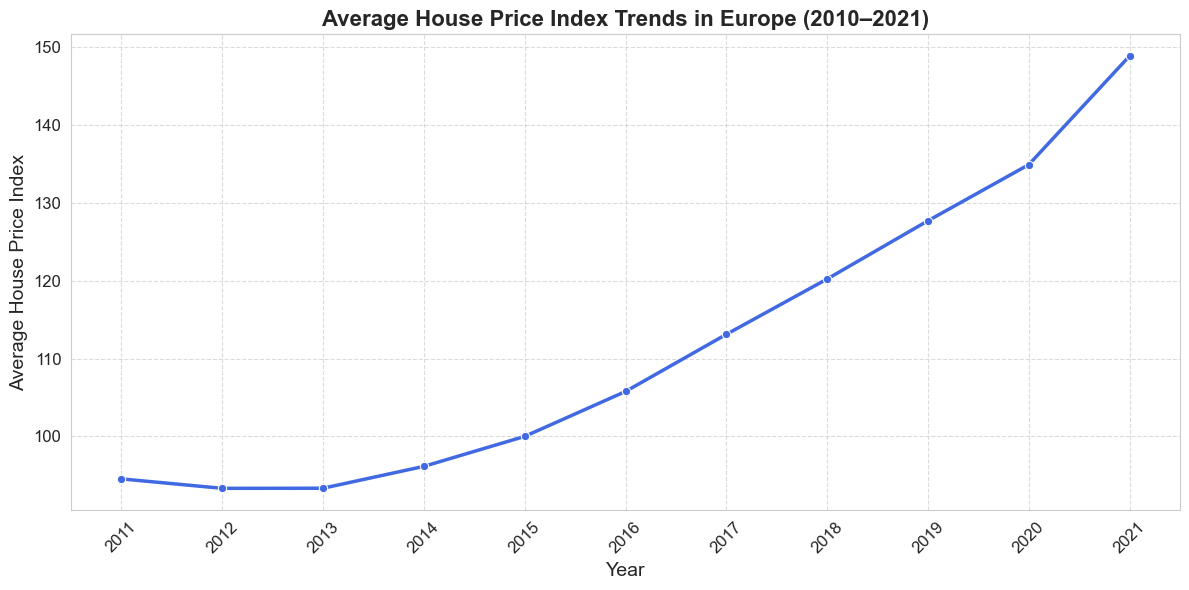

In [ ]:

sns.set_style("whitegrid")

# Aggregate: mean house price index per year
df_avg = df_long.groupby("year")["house_price_index"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_avg,
    x="year",
    y="house_price_index",
    marker="o",
    linewidth=2.5,
    color="royalblue"
)

plt.title("Average House Price Index Trends in Europe (2010–2021)", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average House Price Index", fontsize=14)
plt.xticks(df_avg["year"], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


# Income vs Price Growth (Affordability)
"Next, we compare average incomes with house prices to measure affordability.

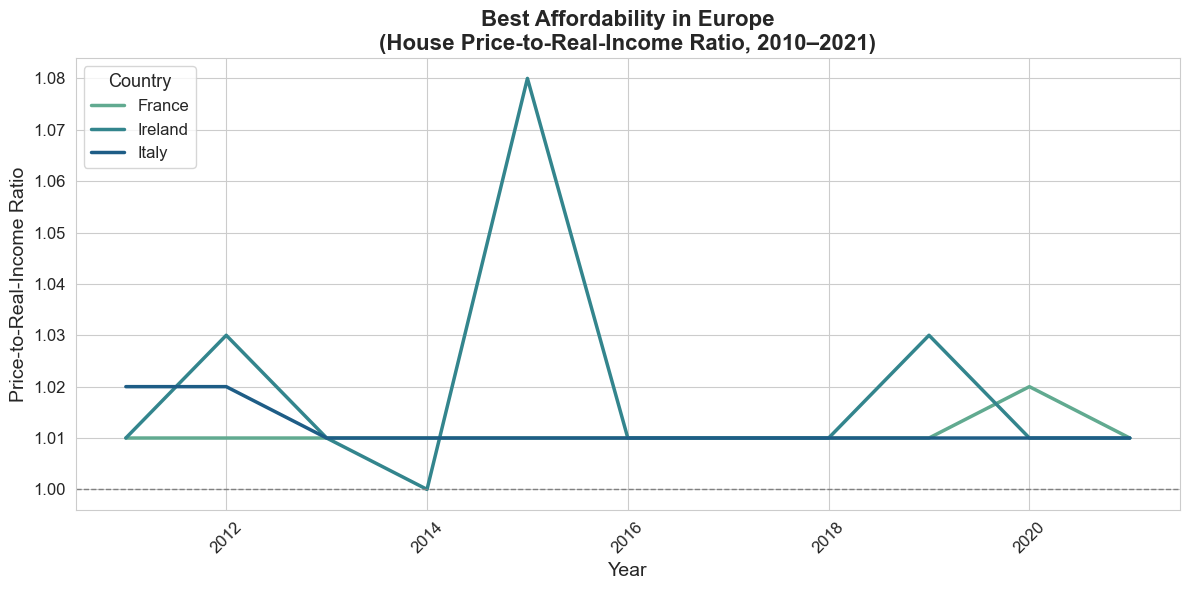

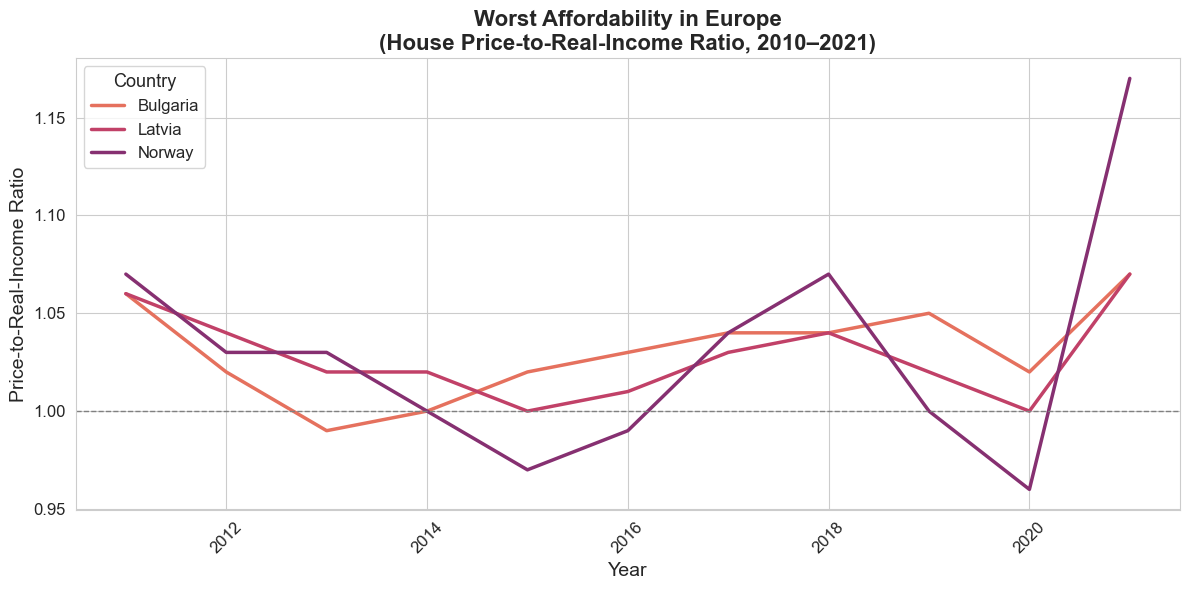

In [ ]:


sns.set_style("whitegrid")

# ---- 3 Best Affordability ----
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_bottom_countries, 
    x='year', y='price_to_real_income_ratio', 
    hue='country', 
    linewidth=2.5, 
    palette="crest"
)

# Reference line (balanced affordability)
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1)

plt.title("Best Affordability in Europe\n(House Price-to-Real-Income Ratio, 2010–2021)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price-to-Real-Income Ratio", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Country", fontsize=12, title_fontsize=13, loc="upper left", frameon=True)
plt.tight_layout()
plt.show()

# ---- 3 Worst Affordability ----
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_top_countries, 
    x='year', y='price_to_real_income_ratio', 
    hue='country', 
    linewidth=2.5, 
    palette="flare"
)

plt.axhline(1.0, color='gray', linestyle='--', linewidth=1)

plt.title("Worst Affordability in Europe\n(House Price-to-Real-Income Ratio, 2010–2021)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price-to-Real-Income Ratio", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Country", fontsize=12, title_fontsize=13, loc="upper left", frameon=True)
plt.tight_layout()
plt.show()


Countries such as norway,latvia,blugaria experienced the sharpest decline in affordability.

## Correlation Analysis of Housing Affordability Factors

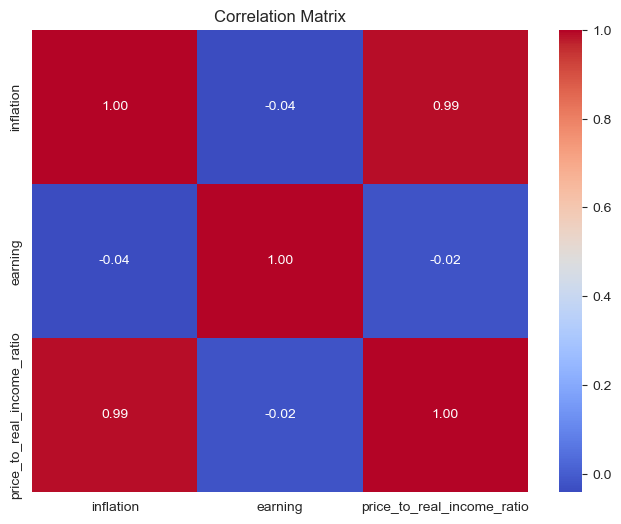

In [29]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df_long[['inflation', 'earning', 'price_to_real_income_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Housing affordability in Europe appears to be **driven primarily by inflation rather than income growth**.it making it harder for households to keep up with rising housing costs.

In [16]:
df_long['hpi_growth'] = df_long.groupby('geo')['house_price_index'].pct_change() * 100
df_long['income_growth'] = df_long.groupby('geo')['earning'].pct_change() * 100
df_long.tail(10)


,geo,country,year,house_price_index,inflation,earning,price_to_income_ratio,real_hpi,price_to_real_income_ratio,hpi_growth,income_growth
232,LT,Lithuania,2021,163.84,6.508053,11798.21,0.01,153.828744,1.07,16.050432,9.368560
233,LU,Luxembourg,2021,172.15,6.181292,44934.82,0.00,162.128371,1.06,13.916093,1.263118
234,LV,Latvia,2021,161.65,6.881442,11229.49,0.01,151.242346,1.07,10.893874,14.740713
235,MT,Malta,2021,135.44,1.810518,18292.50,0.01,133.031442,1.02,5.106317,-6.922134
236,NL,Netherlands,2021,164.21,2.524821,40660.61,0.00,160.166092,1.03,15.033275,3.877437
237,NO,Norway,2021,137.66,16.911350,46935.39,0.00,117.747336,1.17,9.158671,10.345624
238,PL,Poland,2021,147.77,5.052506,11134.57,0.01,140.662994,1.05,9.168144,-2.125286
239,PT,Portugal,2021,168.84,1.398792,13502.54,0.01,166.510860,1.01,9.401931,4.389325
240,SE,Sweden,2021,134.46,2.976153,35485.73,0.00,130.573920,1.03,10.113832,6.350797
241,SI,Slovenia,2021,151.32,2.607087,14601.22,0.01,147.475193,1.03,11.543565,5.069012


Inflation vs house prices (real_hpi, hpi_growth) → checks if inflation drives nominal prices up.
- **HPI** measures housing price changes relative to a base year (10).  
- It’s **nominal**, meaning it includes inflation effects.  
- To see the *true* change in housing values, we adjust for inflation:

- **Nominal HPI** shows observed price growth.  
- **Real HPI** shows actual value growth, removing inflation’s effect.  
- This is key for testing how much housing prices rise due to the market vs. inflation.  

Income growth vs house price growth → shows if house prices are growing faster than earnings (key for affordability


# impact of inflation on  house price accoss the diffrent country

Inflation has a moderate positive impact on house prices, but it’s not the only factor influencing them

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_10828\813832528.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


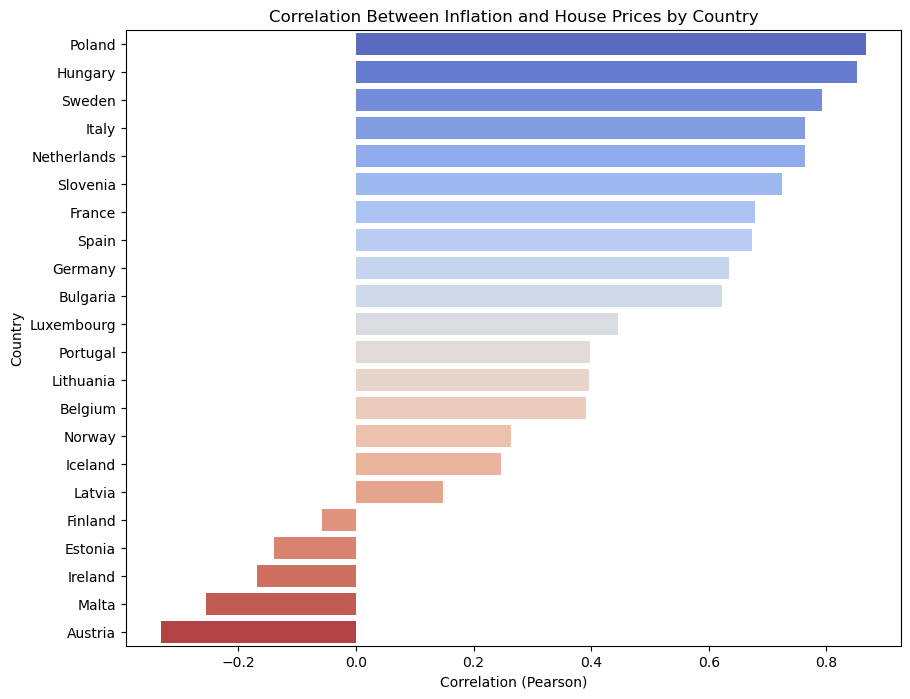

In [20]:
# Calculate correlation per country
country_corr = (
    df_long.groupby("country")[["house_price_index", "inflation"]]
    .corr()
    .reset_index()
)

# Keep only correlations between house_price and inflation
country_corr = country_corr[country_corr["level_1"] == "inflation"]
country_corr = country_corr.rename(columns={"house_price_index": "correlation"})

# Sort countries by correlation value
country_corr = country_corr.sort_values("correlation", ascending=False)

# Plot correlation per country
plt.figure(figsize=(10, 8))
sns.barplot(
    data=country_corr,
    x="correlation",
    y="country",
    palette="coolwarm"
)
plt.title("Correlation Between Inflation and House Prices by Country")
plt.xlabel("Correlation (Pearson)")
plt.ylabel("Country")
plt.show()






Central & Eastern Europe (e.g., Poland, Hungary) → most sensitive: housing markets quickly react to inflation.

Western Europe (e.g., Austria, Belgium, Luxembourg) → more stable: high wages, better credit access, and more regulated housing sectors dampen the inflation effect.

Nordic countries → mixed picture: Sweden reacts strongly, while Norway, Iceland, and Finland are more resilient.

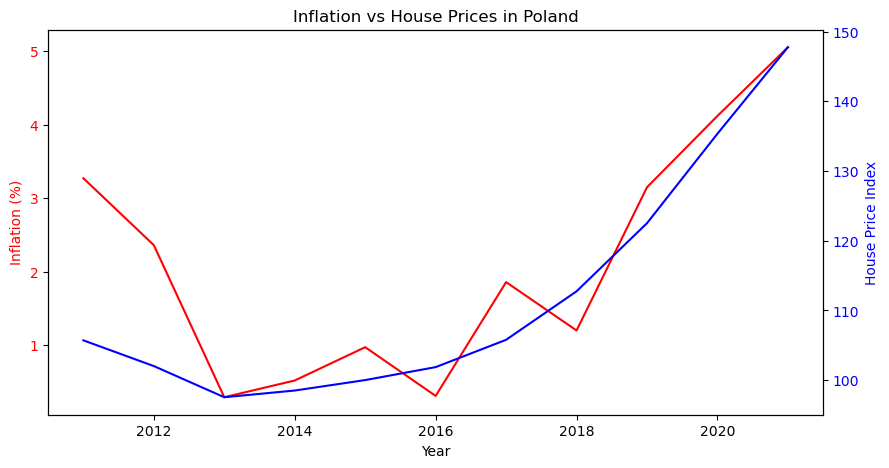

In [21]:
country = "Poland"
df_country = df_long[df_long["country"] == country]

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title(f"Inflation vs House Prices in {country}")
ax1.set_xlabel("Year")
ax1.plot(df_country["year"], df_country["inflation"], color="red", label="Inflation (%)")
ax1.set_ylabel("Inflation (%)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(df_country["year"], df_country["house_price_index"], color="blue", label="House Price Index")
ax2.set_ylabel("House Price Index", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")
plt.show()


In Poland, rising inflation after 2016 is closely linked to a strong increase in house prices, showing a positive relationship between the two.

coulusion

In Poland and Germany, rising inflation after 2016 is linked to a strong increase in house prices.

In Spain, house prices recovered more slowly despite moderate inflation.

This shows that while inflation influences housing prices, other factors — like demand, wages, and housing supply — also play a big role.

# forcast for the next 5 year

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Predi

                               SARIMAX Results                                
Dep. Variable:      house_price_index   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -26.555
Date:                Tue, 26 Aug 2025   AIC                             59.110
Time:                        12:57:24   BIC                             60.018
Sample:                             0   HQIC                            58.114
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9351      0.156      5.981      0.000       0.629       1.242
ma.L1          0.5356      0.496      1.081      0.280      -0.436       1.507
sigma2         8.5905      6.084      1.412      0.1

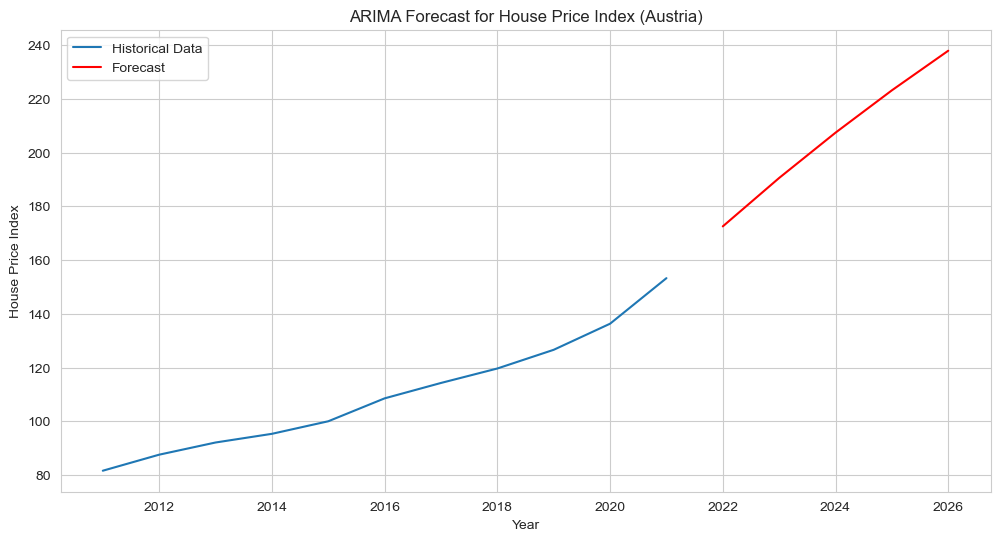

In [ ]:
# Filter data for Austria
country_data = df_long[df_long['country'] == 'Austria']
country_data = country_data.set_index('year')

# Select the series
time_series = country_data['house_price_index']
model = ARIMA(time_series, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
forecast_steps = 5 
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12,6))
plt.plot(time_series.index, time_series, label="Historical Data")
plt.plot(range(time_series.index[-1]+1, time_series.index[-1]+1+forecast_steps),
         forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast for House Price Index (Austria)")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.legend()
plt.show()
